In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns

### LD衰减图

In [2]:
whole = pd.read_csv('./allbin.bin',header=0,sep='\t')
whole['Type'] = 'Whole'
whole.head()

,#Dist,Mean_r^2,Mean_D',Sum_r^2,Sum_D',NumberPairs,Type
0,10,0.498678,NaN,451032.9299,NaN,904458,Whole
1,20,0.475287,NaN,440816.8479,NaN,927476,Whole
2,30,0.468874,NaN,418379.0386,NaN,892305,Whole
3,40,0.463856,NaN,400368.6126,NaN,863132,Whole
4,50,0.458874,NaN,383042.8669,NaN,834745,Whole


In [3]:
ca = pd.read_csv('./cabin.bin',header=0,sep='\t')
ca['Type'] = 'Aus'
ca.head()

,#Dist,Mean_r^2,Mean_D',Sum_r^2,Sum_D',NumberPairs,Type
0,10,0.614283,NaN,311077.1690,NaN,506407,Aus
1,20,0.585693,NaN,298411.0573,NaN,509501,Aus
2,30,0.576076,NaN,280327.3060,NaN,486615,Aus
3,40,0.565823,NaN,264737.4709,NaN,467880,Aus
4,50,0.557671,NaN,251266.6805,NaN,450564,Aus


In [4]:
cb = pd.read_csv('./cbbin.bin',header=0,sep='\t')
cb['Type'] = 'Basmati'
cb.head()

,#Dist,Mean_r^2,Mean_D',Sum_r^2,Sum_D',NumberPairs,Type
0,10,0.677113,NaN,303591.6140,NaN,448362,Basmati
1,20,0.654418,NaN,295159.0225,NaN,451025,Basmati
2,30,0.642993,NaN,275757.8426,NaN,428866,Basmati
3,40,0.632591,NaN,260540.9745,NaN,411863,Basmati
4,50,0.623640,NaN,246400.8452,NaN,395101,Basmati


In [5]:
gj = pd.read_csv('./gjbin.bin', sep='\t', header=0)
gj['Type'] = 'Japonica'
gj.head()

,#Dist,Mean_r^2,Mean_D',Sum_r^2,Sum_D',NumberPairs,Type
0,10,0.638674,NaN,350134.9201,NaN,548222,Japonica
1,20,0.620491,NaN,346291.0715,NaN,558092,Japonica
2,30,0.615323,NaN,328969.7347,NaN,534629,Japonica
3,40,0.609657,NaN,315315.5877,NaN,517202,Japonica
4,50,0.606628,NaN,302021.0520,NaN,497869,Japonica


In [6]:
xi = pd.read_csv('./xibin.bin',sep='\t',header=0)
xi['Type'] = 'Indica'
xi.head()

,#Dist,Mean_r^2,Mean_D',Sum_r^2,Sum_D',NumberPairs,Type
0,10,0.500704,NaN,433292.5886,NaN,865367,Indica
1,20,0.471354,NaN,417877.4010,NaN,886546,Indica
2,30,0.460142,NaN,392144.9272,NaN,852225,Indica
3,40,0.451189,NaN,371759.2874,NaN,823954,Indica
4,50,0.443354,NaN,353075.1861,NaN,796373,Indica


In [7]:
fin_data = pd.concat([whole,ca,cb,gj,xi])
fin_data.head()
# 计算fin_data每种Type的Mean_r^2最大值的一半时（+-0.0001），#Dist对应的值

,#Dist,Mean_r^2,Mean_D',Sum_r^2,Sum_D',NumberPairs,Type
0,10,0.498678,NaN,451032.9299,NaN,904458,Whole
1,20,0.475287,NaN,440816.8479,NaN,927476,Whole
2,30,0.468874,NaN,418379.0386,NaN,892305,Whole
3,40,0.463856,NaN,400368.6126,NaN,863132,Whole
4,50,0.458874,NaN,383042.8669,NaN,834745,Whole


In [8]:
# 首先，按照Type分组并计算每个Type的Mean_r^2最大值的一半
grouped = fin_data.groupby('Type')['Mean_r^2'].max() / 2

# 然后，遍历每个Type，找到Mean_r^2最大值的一半附近的#Dist对应的值的平均值和对应的Mean_r^2的均值
result = {}
for group, max_half_mean_r2 in grouped.items():
    mask = (fin_data['Type'] == group) & (fin_data['Mean_r^2'] >= max_half_mean_r2 - 0.001) & (fin_data['Mean_r^2'] <= max_half_mean_r2 + 0.001)
    selected_values = fin_data.loc[mask, ['#Dist', 'Mean_r^2']]
    dist_mean = selected_values['#Dist'].mean()
    mean_r2_mean = selected_values['Mean_r^2'].mean()
    result[group] = {'#Dist_mean': dist_mean, 'Mean_r^2_mean': mean_r2_mean}

# 输出每种Type对应的平均值和Mean_r^2的均值
for group, values in result.items():
    print(f"Type: {group}, #Dist_mean: {values['#Dist_mean']}, Mean_r^2_mean: {values['Mean_r^2_mean']}")

Type: Aus, #Dist_mean: 64035.71428571428, Mean_r^2_mean: 0.30729639274326515
Type: Basmati, #Dist_mean: 132246.2962962963, Mean_r^2_mean: 0.33884750377398737
Type: Indica, #Dist_mean: 30300.0, Mean_r^2_mean: 0.25019550698322607
Type: Japonica, #Dist_mean: 143795.45454545456, Mean_r^2_mean: 0.3194059715275871
Type: Whole, #Dist_mean: 66550.0, Mean_r^2_mean: 0.24936654811198805


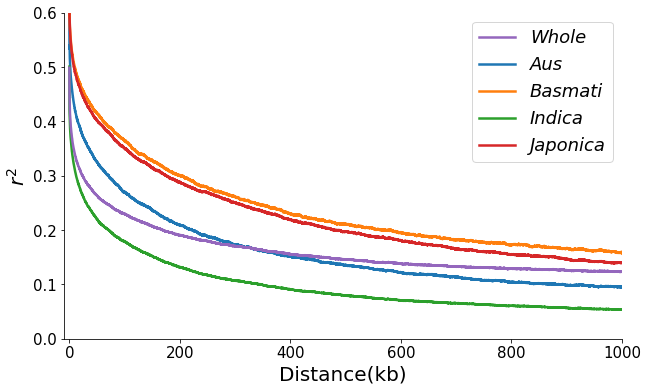

In [11]:
grouped_data = fin_data.groupby('Type')
# 设置图像大小
fig, ax = plt.subplots(figsize=(10, 6))
legend_order = ['Whole', 'Aus','Basmati','Indica', 'Japonica']
for name, group in grouped_data:
    x = group['#Dist']/1000
    y = group['Mean_r^2']
    ax.plot(x, y, label=name, linewidth=2.5)
handles, labels = ax.get_legend_handles_labels()
handles = [handles[labels.index(label)] for label in legend_order]
labels = legend_order
font = FontProperties()
font.set_style('italic')
font.set_size(18)
ax.legend(handles, labels, prop=font, loc='upper right')
# 设置x轴的最大值为300
ax.set_xlim(-10, 1000)
ax.set_ylim(0, 0.6)
# 设置y轴标签为r^2
ax.set_ylabel(r'$r^2$', fontsize=20)
# 设置x轴标签为Distance(kb)
ax.set_xlabel('Distance(kb)', fontsize=20)
# 设置去掉上边框和右边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 设置x轴和y轴的刻度大小
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
# 绘制一条y=0.2的水平线
# ax.axhline(y=0.28, color='grey', linestyle='--')
# 保存图片
plt.savefig('LD.pdf', dpi=300, bbox_inches='tight')
plt.show()

### PCA

In [21]:
pca_result = pd.read_csv('./826pca.eigenvec', sep='\s+', header=None,index_col=0)
pca_need = pca_result.loc[:, [2, 3]]
pca_need.head()

,2,3
0,,
B001,0.057498,-0.018644
B005,0.067186,-0.019575
B009,-0.023587,-0.014189
B011,-0.022160,0.002697
B015,-0.024674,-0.014993


In [23]:
sub = pd.read_clipboard(sep='\t',header=0,index_col=0)
sub = sub.loc[:,['K5']]
final = pd.merge(pca_need,sub,left_index=True,right_index=True)
final.head()

,2,3,K5
B001,0.057498,-0.018644,GJ
B005,0.067186,-0.019575,GJ
B009,-0.023587,-0.014189,XI
B011,-0.022160,0.002697,XI
B015,-0.024674,-0.014993,XI


In [24]:
# 将Sub列的GJ替换为Japonica,XI替换为Indica
final['K5'] = final['K5'].replace(['GJ','XI','cA','cB'],['Japonica','Indica','Aus','Basmati'])
# 将fin按Sub列进行排序，先Indica后Japonica
final = final.sort_values(by='K5')
final.head()

,2,3,K5
IRIS_313-11888,0.003042,0.124017,Aus
IRIS_313-11170,0.003905,0.138251,Aus
IRIS_313-11169,0.001588,0.128366,Aus
IRIS_313-11165,-0.008514,0.078403,Aus
IRIS_313-11164,0.002965,0.137191,Aus


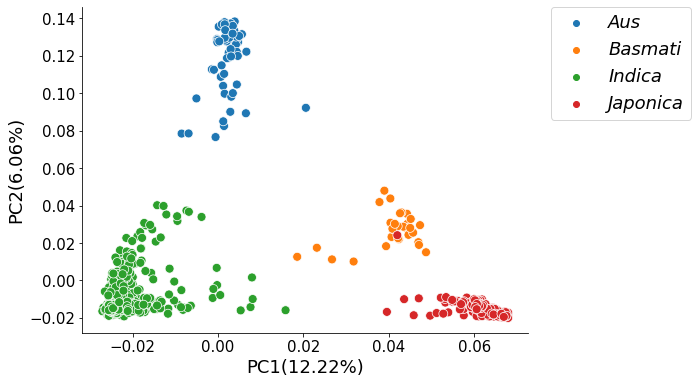

In [25]:
# 绘制散点图
plt.figure(figsize=(8, 6))
# 绘制散点图，设置散点大小为80
sns.scatterplot(x=final[2], y=final[3], hue='K5', data=final, s=80)
font = FontProperties()
font.set_style('italic')
font.set_size(18)
# 修改legend在图外
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, prop=font)
# 修改x轴和y轴的名称
plt.xlabel('PC1(12.22%)', fontsize=18)
plt.ylabel('PC2(6.06%)', fontsize=18)
# 设置去掉上边框和右边框
sns.despine()
# 设置x轴和y轴的刻度的字体大小
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('pca.png', dpi=300, bbox_inches='tight')
plt.show()

In [37]:
# 蓝='#1f77b4',橙='#ff7f0e',绿='#2ca02c',红='#d62728',紫色='#9467bd',
# 棕='#8c564b',粉='#e377c2',灰='#7f7f7f',黄='#bcbd22',青='#17becf'

C:\Users\gzy\AppData\Local\Temp\ipykernel_23176\691005805.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(p3,p4, 'k--',color='black',linewidth=3)


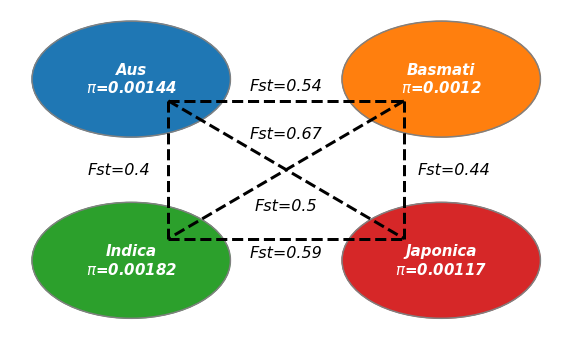

In [103]:
# 定义亚群名称、pi ratio值和Fst值
subpopulations = ['Aus', 'Basmati', 'Indica', 'Japonica']
pi_ratios = [1.44e-3, 1.20e-3, 1.82e-3, 1.17e-3]
Fst_values = [
    [0.0, 0.54, 0.40, 0.67],
    [0.54, 0.0, 0.50, 0.44],
    [0.40, 0.50, 0.0, 0.59],
    [0.67, 0.44, 0.59, 0.0]
]

# 定义自定义颜色
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# 创建一个新的绘图
plt.figure(figsize=(10, 6))

# 绘制圆圈和标注
circle_positions = [(0, 1.25), (1.25, 1.25), (0, 0), (1.25, 0)]
for i, (x, y) in enumerate(circle_positions):
    plt.gca().add_artist(plt.Circle((x, y), 0.4, fill=True, color=custom_colors[i]))  # 使用自定义颜色
    # 给每个圆圈添加一个灰色的边框
    plt.gca().add_artist(plt.Circle((x, y), 0.4, fill=False, color='grey', linewidth=1.5))
    # 添加标注
    plt.text(x, y, f'{subpopulations[i]}\n$\\pi$={pi_ratios[i]}', ha='center', va='center', color='w',fontsize=15, fontweight='bold',
             style='italic')

# 添加连线和Fst标注
for i in range(len(subpopulations)):
    for j in range(i + 1, len(subpopulations)):
        p1 = [circle_positions[i][0], circle_positions[j][0]]
        p2 = [circle_positions[i][1], circle_positions[j][1]]
        p3 = [x + 0.15 if x == 0 else x - 0.15 if x == 1.25 else x for x in p1]
        p4 = [x + 0.15 if x == 0 else x - 0.15 if x == 1.25 else x for x in p2]
        plt.plot(p3,p4, 'k--',color='black',linewidth=3)
        x1 = (circle_positions[i][0] + circle_positions[j][0]) / 2
        y1 = (circle_positions[i][1] + circle_positions[j][1]) / 2
        if x1 == 0:
            x1 = x1 - 0.05
        elif x1 == 1.25:
            x1 = x1 + 0.05
        if x1 == 0.625:
            if y1 == 0.625:
                if circle_positions[i][0] == 0:
                    x1 = x1
                    y1 = y1 + 0.25
                else:
                    x1 = x1
                    y1 = y1 - 0.25
            elif y1 == 1.25:
                y1 = y1 - 0.05
            elif y1 == 0:
                y1 = y1 + 0.05
        plt.text(x1,y1,
                 f'Fst={Fst_values[i][j]}', ha='center', va='center', color='k', fontsize=16,style='italic')

# 设置坐标轴范围
plt.xlim(-0.5, 1.75)
plt.ylim(-0.5, 1.75)

# 删除坐标轴及四周的边框
plt.axis('off')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# 保存图形
plt.savefig('Fst_pi.pdf', dpi=300, bbox_inches='tight')

# 显示图形
plt.show()

##### 整个基因组大小：373083310

### admixture

#### Q4

In [104]:
sample = pd.read_csv('./new_vcf.nosex', sep='\t', header=None,names=['id','sample'])
sample_ls = sample['sample'].tolist()
print(sample_ls[:5])
print(len(sample_ls))

['B001', 'B005', 'B009', 'B011', 'B015']
826


In [113]:
q_matrix = pd.read_csv('./ldadmix.4.Q', sep='\s+', header=None,names=['Q1','Q2','Q3','Q4'])
q_matrix.index = sample_ls
q_matrix.head()

,Q1,Q2,Q3,Q4
B001,0.000010,0.000010,0.99115,0.008830
B005,0.000010,0.000010,0.99997,0.000010
B009,0.000010,0.101862,0.00001,0.898118
B011,0.110423,0.305742,0.00001,0.583825
B015,0.000010,0.000010,0.00001,0.999970


In [115]:
sub = pd.read_clipboard(sep='\t',header=0,index_col=0)
sub = sub.loc[:,['K5']]
fin_qmatrix = pd.merge(q_matrix,sub,left_index=True,right_index=True)
# 将Sub列的GJ替换为Japonica,XI替换为Indica
fin_qmatrix['K5'] = fin_qmatrix['K5'].replace(['GJ','XI','cA','cB'],['Japonica','Indica','Aus','Basmati'])
# 将fin按照K5进行排序
fin_qmatrix = fin_qmatrix.sort_values(by='K5')
fin_qmatrix.head()

,Q1,Q2,Q3,Q4,K5
IRIS_313-11888,0.999970,0.000010,0.000010,0.00001,Aus
IRIS_313-11170,0.999970,0.000010,0.000010,0.00001,Aus
IRIS_313-11169,0.999970,0.000010,0.000010,0.00001,Aus
IRIS_313-11165,0.670229,0.329748,0.000013,0.00001,Aus
IRIS_313-11164,0.999970,0.000010,0.000010,0.00001,Aus


In [116]:
fin_qmatrix.to_csv('./q_matrix.txt', sep='\t', index=True, header=True)

In [126]:
# fin_qmatrix依据K5、Q1、Q3、Q4、Q2的顺序从大到小排列
sorted_qmatrix = pd.read_csv('./q_matrix.txt', sep='\t', header=0, index_col=0)
sorted_qmatrix.head()

,Q1,Q2,Q3,Q4,K5
IRIS_313-11888,1.0,0.0,0.0,0.0,Aus
IRIS_313-11170,1.0,0.0,0.0,0.0,Aus
IRIS_313-11169,1.0,0.0,0.0,0.0,Aus
IRIS_313-11164,1.0,0.0,0.0,0.0,Aus
IRIS_313-11154,1.0,0.0,0.0,0.0,Aus


In [172]:
fin_qmatrix_4q = sorted_qmatrix

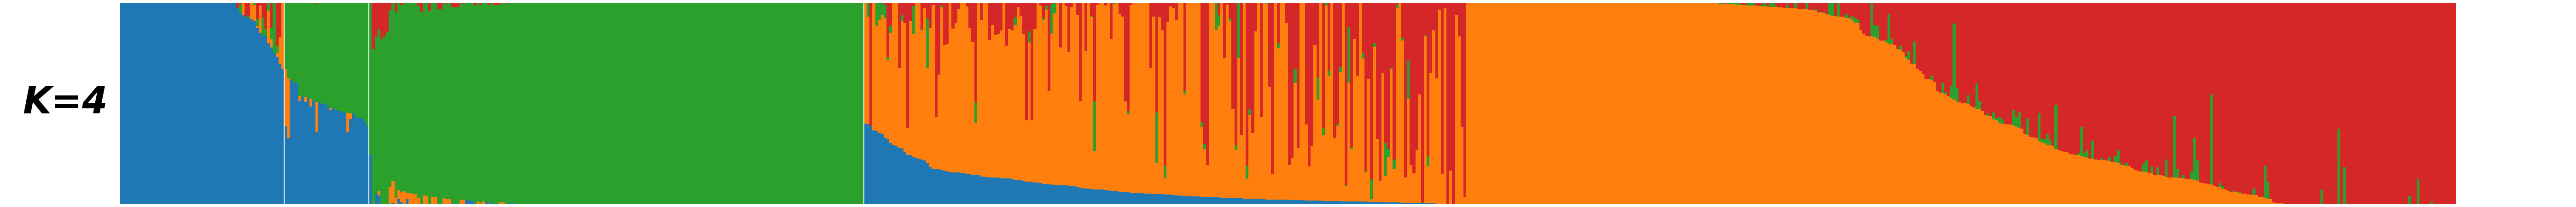

In [141]:
df = sorted_qmatrix

# 绘制柱状堆积图
plt.figure(figsize=(100, 8))
plt.bar(df.index, df['Q1'], label='Q1',width=1)
plt.bar(df.index, df['Q2'], bottom=df['Q1'], label='Q2',width=1)
plt.bar(df.index, df['Q3'], bottom=df['Q1'] + df['Q2'], label='Q3',width=1)
plt.bar(df.index, df['Q4'], bottom=df['Q1'] + df['Q2'] + df['Q3'], label='Q4',width=1)

# 在不同类别的K5间插入一个小空隙
for i in range(len(df)):
    if i > 0 and df['K5'][i] != df['K5'][i-1]:
        plt.axvline(i-0.5, color='white', linewidth=2)

# 删除坐标轴和四周边框
plt.axis('off')

# 在图片的最左端写一个“K=4”
plt.text(-35, 0.45, "K=4", fontsize=80, fontweight='bold', fontstyle='italic')

# 显示图形
plt.show()

#### Q2

In [143]:
q_matrix = pd.read_csv('./ldadmix.2.Q', sep='\s+', header=None,names=['Q1','Q2'])
q_matrix.index = sample_ls
fin_qmatrix_2q = pd.merge(q_matrix,sub,left_index=True,right_index=True)
# 将Sub列的GJ替换为Japonica,XI替换为Indica
fin_qmatrix_2q['K5'] = fin_qmatrix_2q['K5'].replace(['GJ','XI','cA','cB'],['Japonica','Indica','Aus','Basmati'])
# 将fin按照K5进行排序
fin_qmatrix_2q = fin_qmatrix_2q.sort_values(by='K5')
fin_qmatrix_2q.head()

,Q1,Q2,K5
IRIS_313-11888,0.696103,0.303897,Aus
IRIS_313-11170,0.752867,0.247133,Aus
IRIS_313-11169,0.707168,0.292832,Aus
IRIS_313-11165,0.462821,0.537179,Aus
IRIS_313-11164,0.726208,0.273792,Aus


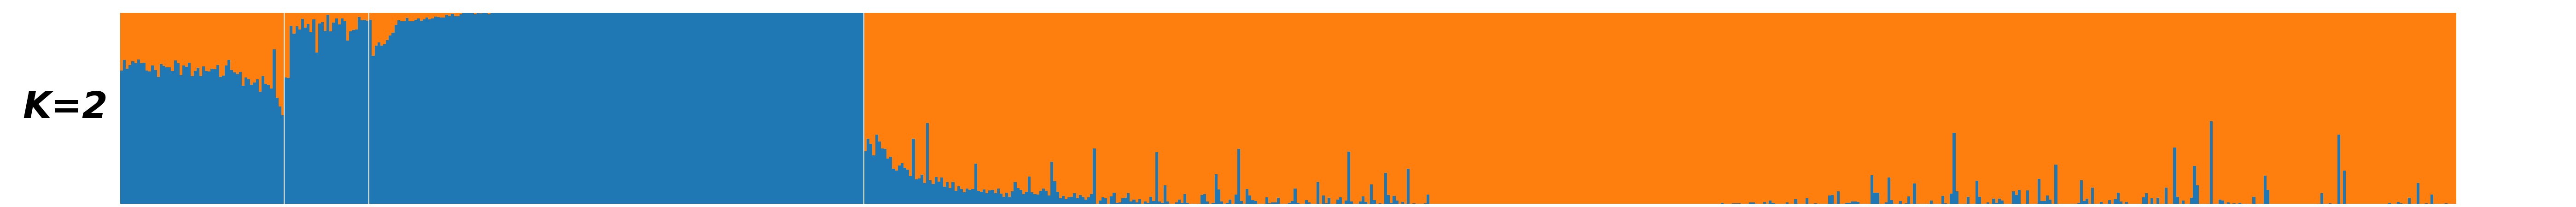

In [153]:
fin_qmatrix_2q = fin_qmatrix_2q.loc[sorted_qmatrix.index, :]
df = fin_qmatrix_2q

# 绘制柱状堆积图
plt.figure(figsize=(100, 8))
plt.bar(df.index, df['Q1'], label='Q1',width=1)
plt.bar(df.index, df['Q2'], bottom=df['Q1'], label='Q2',width=1)

# 在不同类别的K5间插入一个小空隙
for i in range(len(df)):
    if i > 0 and df['K5'][i] != df['K5'][i-1]:
        plt.axvline(i-0.5, color='white', linewidth=2)

# 删除坐标轴和四周边框
plt.axis('off')

# 在图片的最左端写一个“K=4”
plt.text(-35, 0.45, "K=2", fontsize=80, fontweight='bold', fontstyle='italic')

# 显示图形
plt.show()

#### Q3

In [150]:
q_matrix = pd.read_csv('./ldadmix.3.Q', sep='\s+', header=None,names=['Q1','Q2','Q3'])
q_matrix.index = sample_ls
fin_qmatrix_3q = pd.merge(q_matrix,sub,left_index=True,right_index=True)
# 将Sub列的GJ替换为Japonica,XI替换为Indica
fin_qmatrix_3q['K5'] = fin_qmatrix_3q['K5'].replace(['GJ','XI','cA','cB'],['Japonica','Indica','Aus','Basmati'])
# 将fin按照K5进行排序
fin_qmatrix_3q = fin_qmatrix_3q.sort_values(by='K5')
fin_qmatrix_3q.head()

,Q1,Q2,Q3,K5
IRIS_313-11888,0.000011,0.999979,0.00001,Aus
IRIS_313-11170,0.000010,0.999980,0.00001,Aus
IRIS_313-11169,0.000012,0.999978,0.00001,Aus
IRIS_313-11165,0.313545,0.686445,0.00001,Aus
IRIS_313-11164,0.000010,0.999980,0.00001,Aus


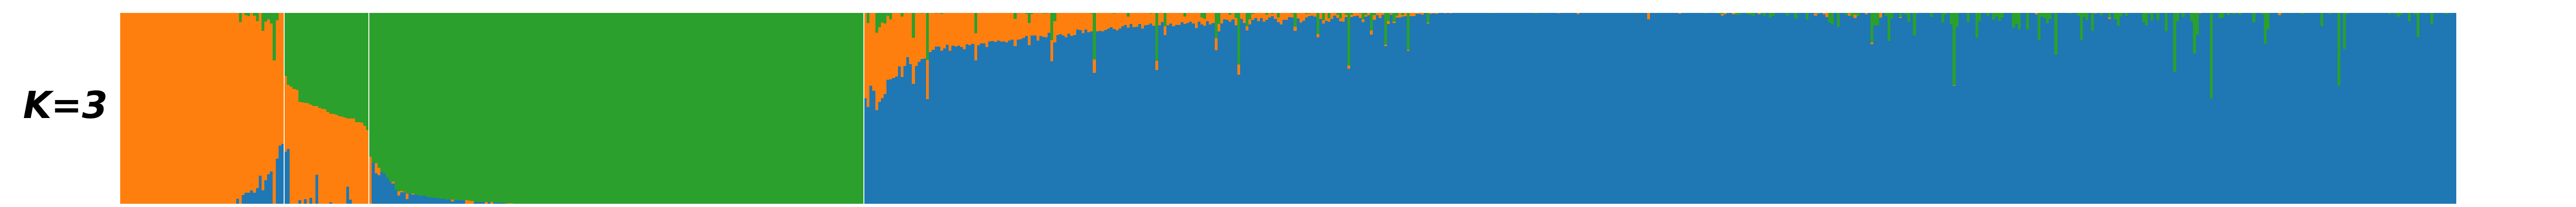

In [154]:
fin_qmatrix_3q = fin_qmatrix_3q.loc[sorted_qmatrix.index, :]
df = fin_qmatrix_3q

# 绘制柱状堆积图
plt.figure(figsize=(100, 8))
plt.bar(df.index, df['Q1'], label='Q1',width=1)
plt.bar(df.index, df['Q2'], bottom=df['Q1'], label='Q2',width=1)
plt.bar(df.index, df['Q3'], bottom=df['Q1'] + df['Q2'], label='Q3',width=1)

# 在不同类别的K5间插入一个小空隙
for i in range(len(df)):
    if i > 0 and df['K5'][i] != df['K5'][i-1]:
        plt.axvline(i-0.5, color='white', linewidth=2)

# 删除坐标轴和四周边框
plt.axis('off')

# 在图片的最左端写一个“K=4”
plt.text(-35, 0.45, "K=3", fontsize=80, fontweight='bold', fontstyle='italic')

# 显示图形
plt.show()

#### Q5

In [161]:
q_matrix = pd.read_csv('./ldadmix.5.Q', sep='\s+', header=None,names=['Q1','Q2','Q3','Q4','Q5'])
q_matrix.index = sample_ls
fin_qmatrix_5q = pd.merge(q_matrix,sub,left_index=True,right_index=True)
# 将Sub列的GJ替换为Japonica,XI替换为Indica
fin_qmatrix_5q['K5'] = fin_qmatrix_5q['K5'].replace(['GJ','XI','cA','cB'],['Japonica','Indica','Aus','Basmati'])
# 将fin按照K5进行排序
fin_qmatrix_5q = fin_qmatrix_5q.sort_values(by='K5')
fin_qmatrix_5q.head()

,Q1,Q2,Q3,Q4,Q5,K5
IRIS_313-11888,0.000010,0.000010,0.00001,0.00001,0.999960,Aus
IRIS_313-11170,0.000017,0.000012,0.00001,0.00001,0.999952,Aus
IRIS_313-11169,0.000010,0.000010,0.00001,0.00001,0.999960,Aus
IRIS_313-11165,0.339452,0.000010,0.00001,0.00001,0.660518,Aus
IRIS_313-11164,0.000010,0.000012,0.00001,0.00001,0.999958,Aus


#### Q6

In [163]:
q_matrix = pd.read_csv('./ldadmix.6.Q', sep='\s+', header=None,names=['Q1','Q2','Q3','Q4','Q5','Q6'])
q_matrix.index = sample_ls
fin_qmatrix_6q = pd.merge(q_matrix,sub,left_index=True,right_index=True)
# 将Sub列的GJ替换为Japonica,XI替换为Indica
fin_qmatrix_6q['K5'] = fin_qmatrix_6q['K5'].replace(['GJ','XI','cA','cB'],['Japonica','Indica','Aus','Basmati'])
# 将fin按照K5进行排序
fin_qmatrix_6q = fin_qmatrix_6q.sort_values(by='K5')
fin_qmatrix_6q.head()

,Q1,Q2,Q3,Q4,Q5,Q6,K5
IRIS_313-11888,0.000011,0.000010,0.00001,0.999949,0.000010,0.00001,Aus
IRIS_313-11170,0.000010,0.000010,0.00001,0.999948,0.000012,0.00001,Aus
IRIS_313-11169,0.000010,0.000010,0.00001,0.999950,0.000010,0.00001,Aus
IRIS_313-11165,0.328023,0.000012,0.00001,0.671935,0.000010,0.00001,Aus
IRIS_313-11164,0.000010,0.000010,0.00001,0.999950,0.000010,0.00001,Aus


#### Q7

In [165]:
q_matrix = pd.read_csv('./ldadmix.7.Q', sep='\s+', header=None,names=['Q1','Q2','Q3','Q4','Q5','Q6','Q7'])
q_matrix.index = sample_ls
fin_qmatrix_7q = pd.merge(q_matrix,sub,left_index=True,right_index=True)
# 将Sub列的GJ替换为Japonica,XI替换为Indica
fin_qmatrix_7q['K5'] = fin_qmatrix_7q['K5'].replace(['GJ','XI','cA','cB'],['Japonica','Indica','Aus','Basmati'])
# 将fin按照K5进行排序
fin_qmatrix_7q = fin_qmatrix_7q.sort_values(by='K5')
fin_qmatrix_7q.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,K5
IRIS_313-11888,0.000010,0.00001,0.00001,0.000011,0.999939,0.00001,0.00001,Aus
IRIS_313-11170,0.000010,0.00001,0.00001,0.000010,0.999940,0.00001,0.00001,Aus
IRIS_313-11169,0.000010,0.00001,0.00001,0.000010,0.999940,0.00001,0.00001,Aus
IRIS_313-11165,0.381138,0.00001,0.00001,0.000010,0.618812,0.00001,0.00001,Aus
IRIS_313-11164,0.000010,0.00001,0.00001,0.000010,0.999940,0.00001,0.00001,Aus


#### Q8

In [166]:
q_matrix = pd.read_csv('./ldadmix.8.Q', sep='\s+', header=None,names=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8'])
q_matrix.index = sample_ls
fin_qmatrix_8q = pd.merge(q_matrix,sub,left_index=True,right_index=True)
# 将Sub列的GJ替换为Japonica,XI替换为Indica
fin_qmatrix_8q['K5'] = fin_qmatrix_8q['K5'].replace(['GJ','XI','cA','cB'],['Japonica','Indica','Aus','Basmati'])
# 将fin按照K5进行排序
fin_qmatrix_8q = fin_qmatrix_8q.sort_values(by='K5')
fin_qmatrix_8q.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,K5
IRIS_313-11888,0.000010,0.000010,0.000010,0.000010,0.000010,0.00001,0.999930,0.00001,Aus
IRIS_313-11170,0.000011,0.000010,0.000010,0.000010,0.000010,0.00001,0.999929,0.00001,Aus
IRIS_313-11169,0.000019,0.000016,0.000013,0.000013,0.000010,0.00001,0.999909,0.00001,Aus
IRIS_313-11165,0.000015,0.364197,0.000010,0.000010,0.000010,0.00001,0.635738,0.00001,Aus
IRIS_313-11164,0.000010,0.000010,0.000010,0.000010,0.000011,0.00001,0.999929,0.00001,Aus


#### Q9

In [167]:
q_matrix = pd.read_csv('./ldadmix.9.Q', sep='\s+', header=None,names=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9'])
q_matrix.index = sample_ls
fin_qmatrix_9q = pd.merge(q_matrix,sub,left_index=True,right_index=True)
# 将Sub列的GJ替换为Japonica,XI替换为Indica
fin_qmatrix_9q['K5'] = fin_qmatrix_9q['K5'].replace(['GJ','XI','cA','cB'],['Japonica','Indica','Aus','Basmati'])
# 将fin按照K5进行排序
fin_qmatrix_9q = fin_qmatrix_9q.sort_values(by='K5')
fin_qmatrix_9q.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,K5
IRIS_313-11888,0.00001,0.00001,0.00001,0.000010,0.000010,0.999920,0.00001,0.00001,0.00001,Aus
IRIS_313-11170,0.00001,0.00001,0.00001,0.000012,0.000010,0.999918,0.00001,0.00001,0.00001,Aus
IRIS_313-11169,0.00001,0.00001,0.00001,0.000010,0.000010,0.999920,0.00001,0.00001,0.00001,Aus
IRIS_313-11165,0.00001,0.00001,0.00001,0.000010,0.363436,0.636494,0.00001,0.00001,0.00001,Aus
IRIS_313-11164,0.00001,0.00001,0.00001,0.000012,0.000010,0.999918,0.00001,0.00001,0.00001,Aus


#### Q10

In [168]:
q_matrix = pd.read_csv('./ldadmix.10.Q', sep='\s+', header=None,names=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10'])
q_matrix.index = sample_ls
fin_qmatrix_10q = pd.merge(q_matrix,sub,left_index=True,right_index=True)
# 将Sub列的GJ替换为Japonica,XI替换为Indica
fin_qmatrix_10q['K5'] = fin_qmatrix_10q['K5'].replace(['GJ','XI','cA','cB'],['Japonica','Indica','Aus','Basmati'])
# 将fin按照K5进行排序
fin_qmatrix_10q = fin_qmatrix_10q.sort_values(by='K5')
fin_qmatrix_10q.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,K5
IRIS_313-11888,0.00001,0.000011,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.999909,0.000010,Aus
IRIS_313-11170,0.00001,0.000012,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.999908,0.000010,Aus
IRIS_313-11169,0.00001,0.000010,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.999910,0.000010,Aus
IRIS_313-11165,0.00001,0.000010,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.634815,0.365105,Aus
IRIS_313-11164,0.00001,0.000010,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.999910,0.000010,Aus


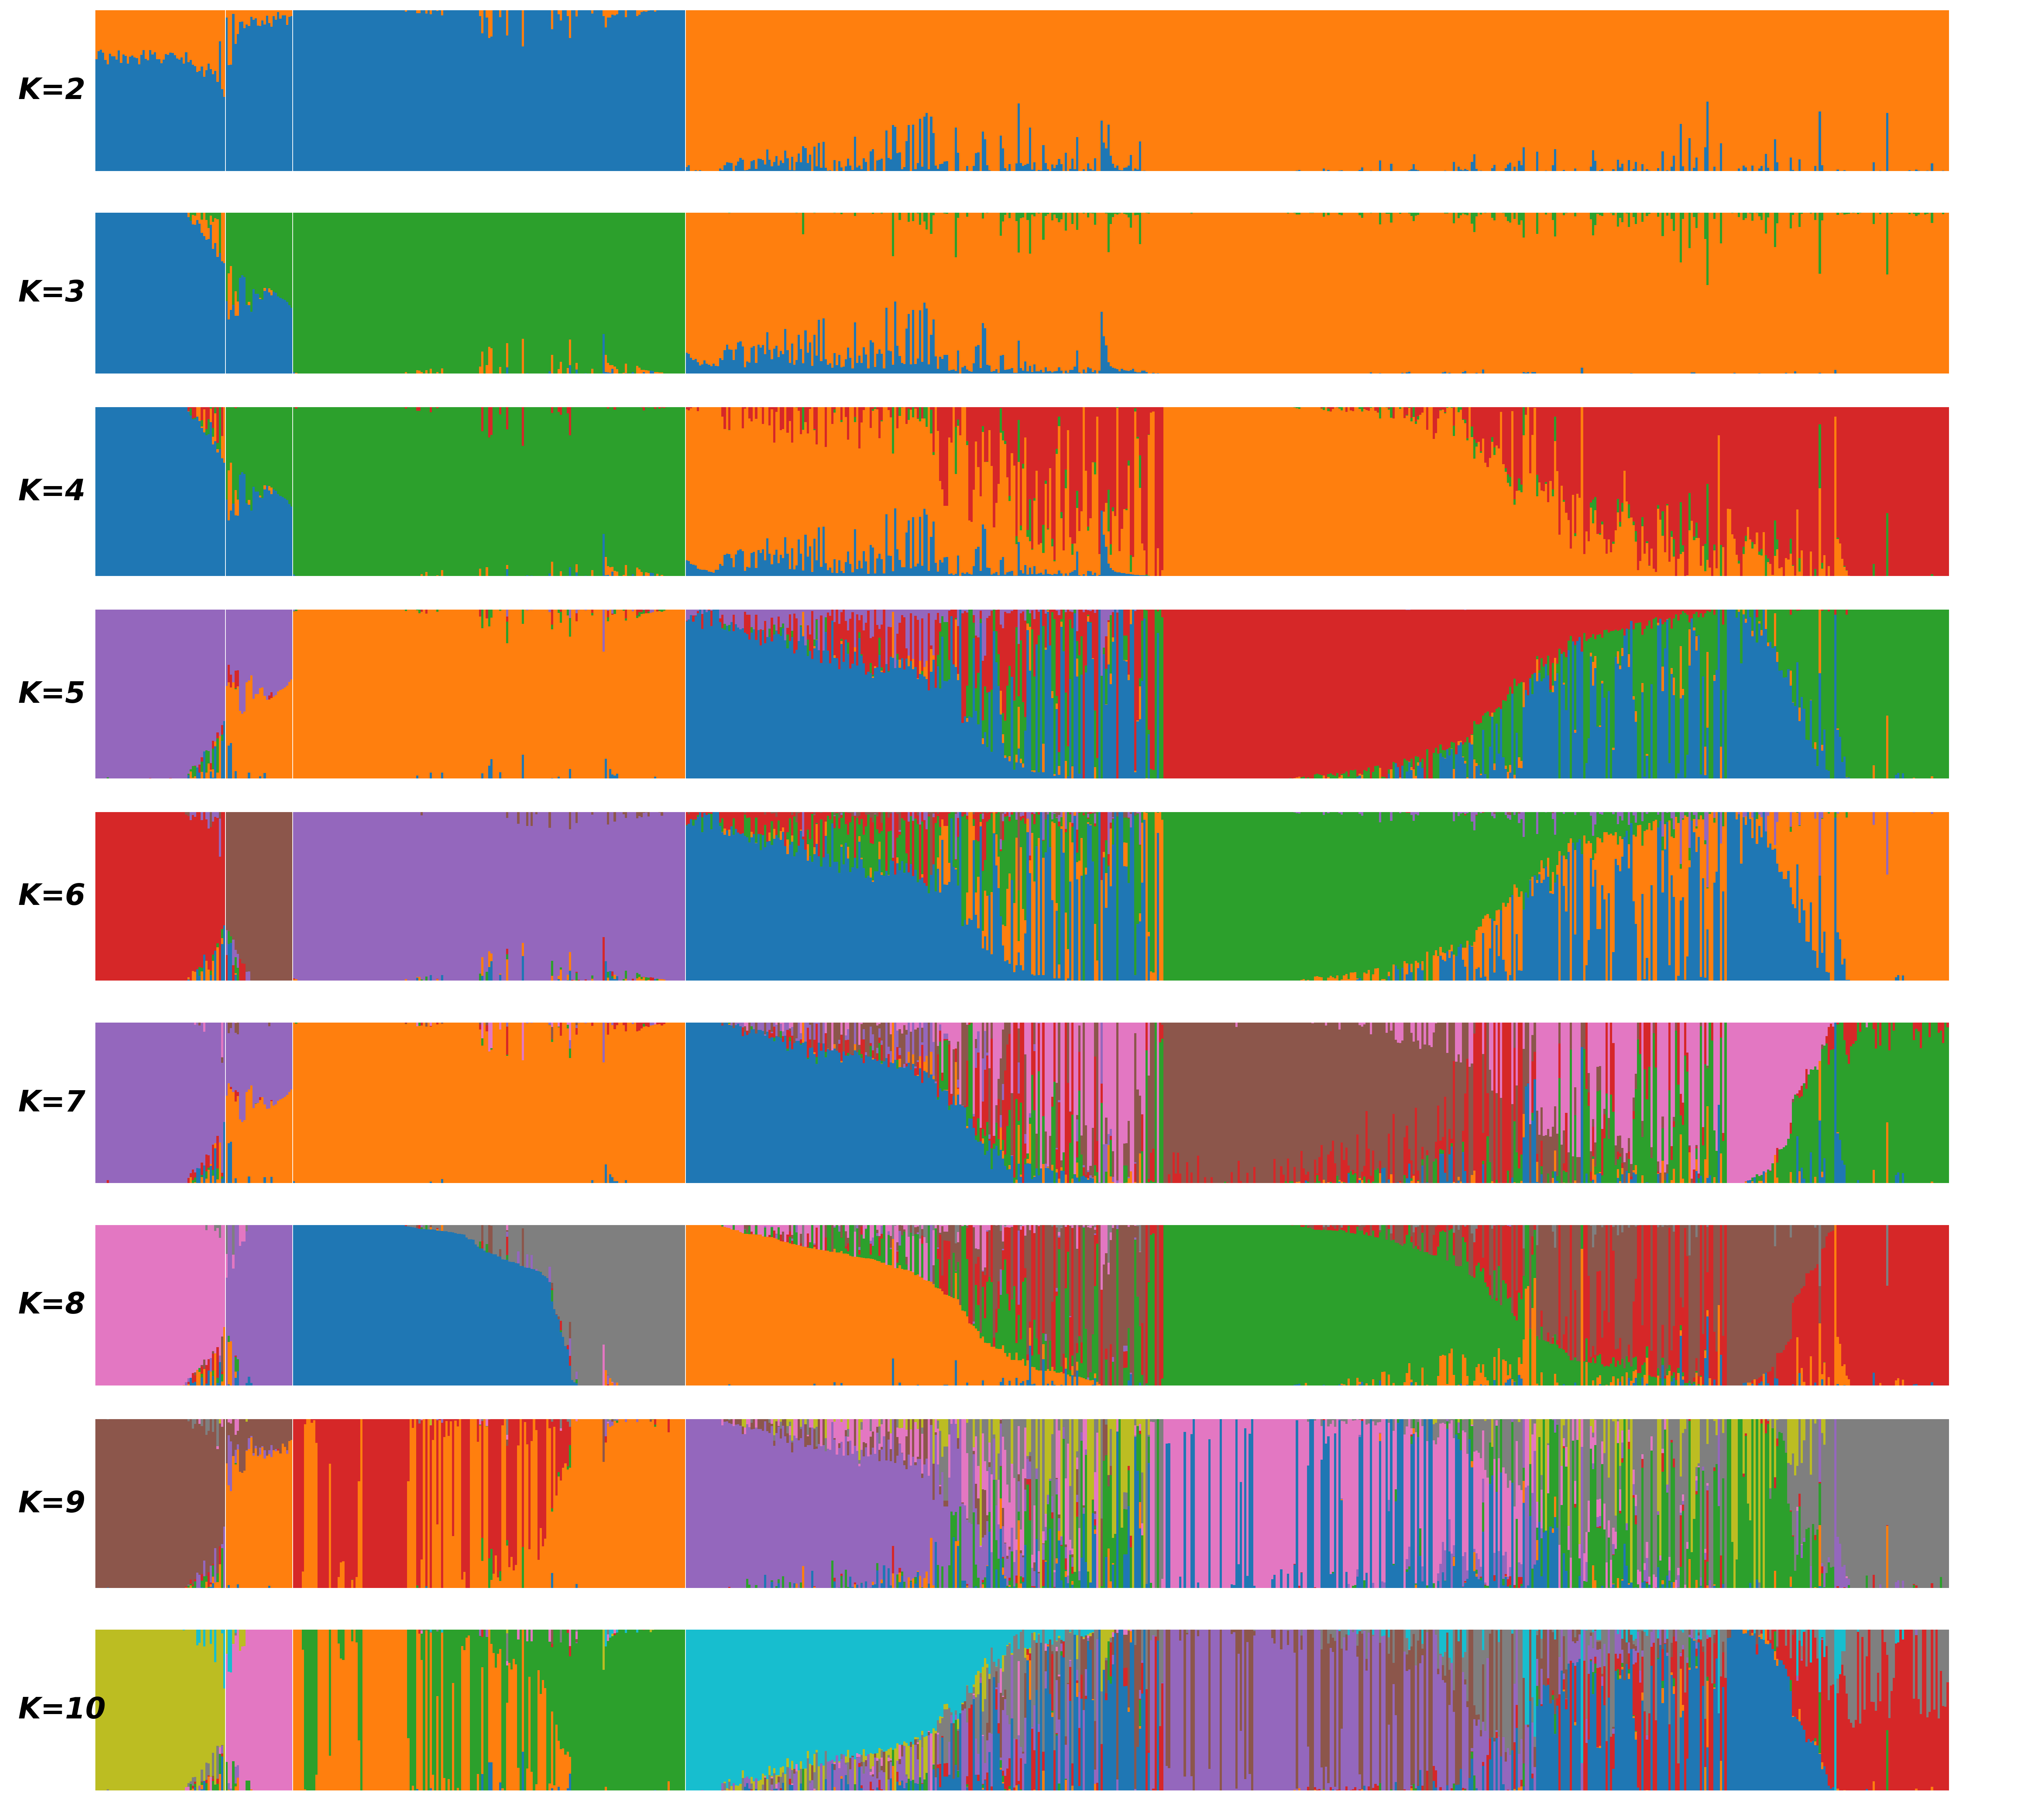

In [175]:
fig, axs = plt.subplots(9, 1, figsize=(100, 90))
fin_qmatrix_2q = fin_qmatrix_2q.loc[sorted_qmatrix.index, :]
df = fin_qmatrix_2q
axs[0].bar(df.index, df['Q1'], label='Q1', width=1)
axs[0].bar(df.index, df['Q2'], bottom=df['Q1'], label='Q2', width=1)
for i in range(len(df)):
    if i > 0 and df['K5'][i] != df['K5'][i-1]:
        axs[0].axvline(i-0.5, color='white', linewidth=2)
axs[0].axis('off')
axs[0].text(-35, 0.45, "K=2", fontsize=80, fontweight='bold', fontstyle='italic')

fin_qmatrix_3q = fin_qmatrix_3q.loc[sorted_qmatrix.index, :]
df = fin_qmatrix_3q
axs[1].bar(df.index, df['Q2'], label='Q1', width=1)
axs[1].bar(df.index, df['Q1'], bottom=df['Q2'], label='Q2', width=1)
axs[1].bar(df.index, df['Q3'], bottom=df['Q2'] + df['Q1'], label='Q3', width=1)
for i in range(len(df)):
    if i > 0 and df['K5'][i] != df['K5'][i-1]:
        axs[1].axvline(i-0.5, color='white', linewidth=2)
axs[1].axis('off')
axs[1].text(-35, 0.45, "K=3", fontsize=80, fontweight='bold', fontstyle='italic')

fin_qmatrix_4q = fin_qmatrix_4q.loc[sorted_qmatrix.index, :]
df = fin_qmatrix_4q
axs[2].bar(df.index, df['Q1'], label='Q1', width=1)
axs[2].bar(df.index, df['Q2'], bottom=df['Q1'], label='Q2', width=1)
axs[2].bar(df.index, df['Q3'], bottom=df['Q1'] + df['Q2'], label='Q3', width=1)
axs[2].bar(df.index, df['Q4'], bottom=df['Q1'] + df['Q2'] + df['Q3'], label='Q4', width=1)
for i in range(len(df)):
    if i > 0 and df['K5'][i] != df['K5'][i-1]:
        axs[2].axvline(i-0.5, color='white', linewidth=2)
axs[2].axis('off')
axs[2].text(-35, 0.45, "K=4", fontsize=80, fontweight='bold', fontstyle='italic')

fin_qmatrix_5q = fin_qmatrix_5q.loc[sorted_qmatrix.index, :]
df = fin_qmatrix_5q
axs[3].bar(df.index, df['Q1'], label='Q1', width=1)
axs[3].bar(df.index, df['Q2'], bottom=df['Q1'], label='Q2', width=1)
axs[3].bar(df.index, df['Q3'], bottom=df['Q1'] + df['Q2'], label='Q3', width=1)
axs[3].bar(df.index, df['Q4'], bottom=df['Q1'] + df['Q2'] + df['Q3'], label='Q4', width=1)
axs[3].bar(df.index, df['Q5'], bottom=df['Q1'] + df['Q2'] + df['Q3'] + df['Q4'], label='Q5', width=1)
for i in range(len(df)):
    if i > 0 and df['K5'][i] != df['K5'][i-1]:
        axs[3].axvline(i-0.5, color='white', linewidth=2)
axs[3].axis('off')
axs[3].text(-35, 0.45, "K=5", fontsize=80, fontweight='bold', fontstyle='italic')

fin_qmatrix_6q = fin_qmatrix_6q.loc[sorted_qmatrix.index, :]
df = fin_qmatrix_6q
axs[4].bar(df.index, df['Q1'], label='Q1', width=1)
axs[4].bar(df.index, df['Q2'], bottom=df['Q1'], label='Q2', width=1)
axs[4].bar(df.index, df['Q3'], bottom=df['Q1'] + df['Q2'], label='Q3', width=1)
axs[4].bar(df.index, df['Q4'], bottom=df['Q1'] + df['Q2'] + df['Q3'], label='Q4', width=1)
axs[4].bar(df.index, df['Q5'], bottom=df['Q1'] + df['Q2'] + df['Q3'] + df['Q4'], label='Q5', width=1)
axs[4].bar(df.index, df['Q6'], bottom=df['Q1'] + df['Q2'] + df['Q3'] + df['Q4'] + df['Q5'], label='Q6', width=1)
for i in range(len(df)):
    if i > 0 and df['K5'][i] != df['K5'][i-1]:
        axs[4].axvline(i-0.5, color='white', linewidth=2)
axs[4].axis('off')
axs[4].text(-35, 0.45, "K=6", fontsize=80, fontweight='bold', fontstyle='italic')

fin_qmatrix_7q = fin_qmatrix_7q.loc[sorted_qmatrix.index, :]
df = fin_qmatrix_7q
axs[5].bar(df.index, df['Q1'], label='Q1', width=1)
axs[5].bar(df.index, df['Q2'], bottom=df['Q1'], label='Q2', width=1)
axs[5].bar(df.index, df['Q3'], bottom=df['Q1'] + df['Q2'], label='Q3', width=1)
axs[5].bar(df.index, df['Q4'], bottom=df['Q1'] + df['Q2'] + df['Q3'], label='Q4', width=1)
axs[5].bar(df.index, df['Q5'], bottom=df['Q1'] + df['Q2'] + df['Q3'] + df['Q4'], label='Q5', width=1)
axs[5].bar(df.index, df['Q6'], bottom=df['Q1'] + df['Q2'] + df['Q3'] + df['Q4'] + df['Q5'], label='Q6', width=1)
axs[5].bar(df.index, df['Q7'], bottom=df['Q1'] + df['Q2'] + df['Q3'] + df['Q4'] + df['Q5'] + df['Q6'], label='Q7', width=1)
for i in range(len(df)):
    if i > 0 and df['K5'][i] != df['K5'][i-1]:
        axs[5].axvline(i-0.5, color='white', linewidth=2)
axs[5].axis('off')
axs[5].text(-35, 0.45, "K=7", fontsize=80, fontweight='bold', fontstyle='italic')

fin_qmatrix_8q = fin_qmatrix_8q.loc[sorted_qmatrix.index, :]
df = fin_qmatrix_8q
axs[6].bar(df.index, df['Q1'], label='Q1', width=1)
axs[6].bar(df.index, df['Q2'], bottom=df['Q1'], label='Q2', width=1)
axs[6].bar(df.index, df['Q3'], bottom=df['Q1'] + df['Q2'], label='Q3', width=1)
axs[6].bar(df.index, df['Q4'], bottom=df['Q1'] + df['Q2'] + df['Q3'], label='Q4', width=1)
axs[6].bar(df.index, df['Q5'], bottom=df['Q1'] + df['Q2'] + df['Q3'] + df['Q4'], label='Q5', width=1)
axs[6].bar(df.index, df['Q6'], bottom=df['Q1'] + df['Q2'] + df['Q3'] + df['Q4'] + df['Q5'], label='Q6', width=1)
axs[6].bar(df.index, df['Q7'], bottom=df['Q1'] + df['Q2'] + df['Q3'] + df['Q4'] + df['Q5'] + df['Q6'], label='Q7', width=1)
axs[6].bar(df.index, df['Q8'], bottom=df['Q1'] + df['Q2'] + df['Q3'] + df['Q4'] + df['Q5'] + df['Q6'] + df['Q7'], label='Q8', width=1)
for i in range(len(df)):
    if i > 0 and df['K5'][i] != df['K5'][i-1]:
        axs[6].axvline(i-0.5, color='white', linewidth=2)
axs[6].axis('off')
axs[6].text(-35, 0.45, "K=8", fontsize=80, fontweight='bold', fontstyle='italic')

fin_qmatrix_9q = fin_qmatrix_9q.loc[sorted_qmatrix.index, :]
df = fin_qmatrix_9q
axs[7].bar(df.index, df['Q1'], label='Q1', width=1)
axs[7].bar(df.index, df['Q2'], bottom=df['Q1'], label='Q2', width=1)
axs[7].bar(df.index, df['Q3'], bottom=df['Q1'] + df['Q2'], label='Q3', width=1)
axs[7].bar(df.index, df['Q4'], bottom=df['Q1'] + df['Q2'] + df['Q3'], label='Q4', width=1)
axs[7].bar(df.index, df['Q5'], bottom=df['Q1'] + df['Q2'] + df['Q3'] + df['Q4'], label='Q5', width=1)
axs[7].bar(df.index, df['Q6'], bottom=df['Q1'] + df['Q2'] + df['Q3'] + df['Q4'] + df['Q5'], label='Q6', width=1)
axs[7].bar(df.index, df['Q7'], bottom=df['Q1'] + df['Q2'] + df['Q3'] + df['Q4'] + df['Q5'] + df['Q6'], label='Q7', width=1)
axs[7].bar(df.index, df['Q8'], bottom=df['Q1'] + df['Q2'] + df['Q3'] + df['Q4'] + df['Q5'] + df['Q6'] + df['Q7'], label='Q8', width=1)
axs[7].bar(df.index, df['Q9'], bottom=df['Q1'] + df['Q2'] + df['Q3'] + df['Q4'] + df['Q5'] + df['Q6'] + df['Q7'] + df['Q8'], label='Q9', width=1)
for i in range(len(df)):
    if i > 0 and df['K5'][i] != df['K5'][i-1]:
        axs[7].axvline(i-0.5, color='white', linewidth=2)
axs[7].axis('off')
axs[7].text(-35, 0.45, "K=9", fontsize=80, fontweight='bold', fontstyle='italic')

fin_qmatrix_10q = fin_qmatrix_10q.loc[sorted_qmatrix.index, :]
df = fin_qmatrix_10q
axs[8].bar(df.index, df['Q1'], label='Q1', width=1)
axs[8].bar(df.index, df['Q2'], bottom=df['Q1'], label='Q2', width=1)
axs[8].bar(df.index, df['Q3'], bottom=df['Q1'] + df['Q2'], label='Q3', width=1)
axs[8].bar(df.index, df['Q4'], bottom=df['Q1'] + df['Q2'] + df['Q3'], label='Q4', width=1)
axs[8].bar(df.index, df['Q5'], bottom=df['Q1'] + df['Q2'] + df['Q3'] + df['Q4'], label='Q5', width=1)
axs[8].bar(df.index, df['Q6'], bottom=df['Q1'] + df['Q2'] + df['Q3'] + df['Q4'] + df['Q5'], label='Q6', width=1)
axs[8].bar(df.index, df['Q7'], bottom=df['Q1'] + df['Q2'] + df['Q3'] + df['Q4'] + df['Q5'] + df['Q6'], label='Q7', width=1)
axs[8].bar(df.index, df['Q8'], bottom=df['Q1'] + df['Q2'] + df['Q3'] + df['Q4'] + df['Q5'] + df['Q6'] + df['Q7'], label='Q8', width=1)
axs[8].bar(df.index, df['Q9'], bottom=df['Q1'] + df['Q2'] + df['Q3'] + df['Q4'] + df['Q5'] + df['Q6'] + df['Q7'] + df['Q8'], label='Q9', width=1)
axs[8].bar(df.index, df['Q10'], bottom=df['Q1'] + df['Q2'] + df['Q3'] + df['Q4'] + df['Q5'] + df['Q6'] + df['Q7'] + df['Q8'] + df['Q9'], label='Q10', width=1)
for i in range(len(df)):
    if i > 0 and df['K5'][i] != df['K5'][i-1]:
        axs[8].axvline(i-0.5, color='white', linewidth=2)
axs[8].axis('off')
axs[8].text(-35, 0.45, "K=10", fontsize=80, fontweight='bold', fontstyle='italic')

plt.show()

In [177]:
sorted_qmatrix = pd.read_clipboard(sep='\s+',header=0,index_col=0)
# sorted_qmatrix添加一列type，值根据sorted_qmatrix的前8列来定，哪列的值最大，type就是哪列的列名，不考虑第九列
sorted_qmatrix['type'] = sorted_qmatrix.iloc[:,:8].idxmax(axis=1)
sorted_qmatrix.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,K5,type
IRIS_313-11888,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.99993,0.00001,Aus,Q7
IRIS_313-11154,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.99993,0.00001,Aus,Q7
IRIS_313-11067,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.99993,0.00001,Aus,Q7
IRIS_313-11063,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.99993,0.00001,Aus,Q7
IRIS_313-11210,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.99993,0.00001,Aus,Q7


In [179]:
sorted_qmatrix.to_csv('./8q.txt', sep='\t', header=True, index=True)

In [ ]:
# sorted_qmatrix添加一列type，值根据sorted_qmatrix的Q1、Q2、Q3、Q4、Q5、Q6、Q7、Q8列来定，哪个值最大，type就是哪个
